In [1]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from qiskit.aqua.utils import split_dataset_to_data_and_labels

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.004, plot_data=True):

    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    if plot_data:
        # plot all samples                              
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)
    

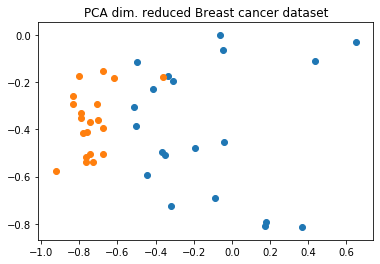

In [2]:
from datasets import Breast_cancer
sample_Total, training_input, test_input, class_labels = Breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    PLOT_DATA=True
)

train = split_dataset_to_data_and_labels(training_input)
test = split_dataset_to_data_and_labels(test_input)

X = train[0][0]
y = train[0][1]

t_X = test[0][0]
t_y = test[0][1]

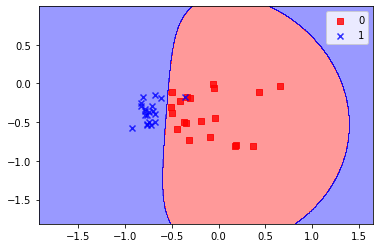

In [3]:
svm = SVC(kernel='rbf', random_state=0, gamma=1.0, C=10.0)  # Radical basis function kernal

svm.fit(X, y)
plot_decision_regions(X, y, svm)
plt.legend()
plt.show()

Predicted: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1] 
Which was  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Overall accuracy of: 0.9
Overall accuracy (with train points) of: 0.975


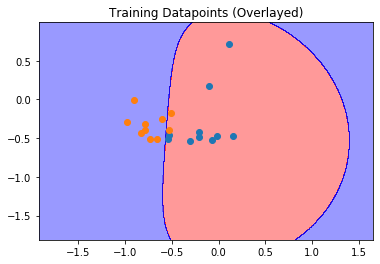

In [4]:
# Test accuracy
result = svm.predict(t_X)
print('Predicted:', result, '\nWhich was ', t_y)
print('Overall accuracy of:', svm.score(t_X, t_y))
print('Overall accuracy (with train points) of:', svm.score(X, y))


# Plot that data!
plt.title('Training Datapoints (Overlayed)')
plot_decision_regions(X, y, svm, plot_data=False)
plt.scatter(t_X[t_y==0][:, 0], t_X[t_y==0][:, 1])
plt.scatter(t_X[t_y==1][:, 0], t_X[t_y==1][:, 1])
plt.show()
    

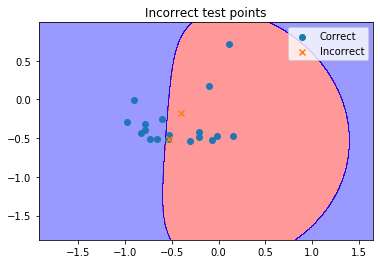

In [5]:
wrong = t_y - result
plt.title('Incorrect test points')
plot_decision_regions(X, y, svm, plot_data=False)
plt.scatter(t_X[wrong==0][:, 0], t_X[wrong==0][:, 1], marker='o', label='Correct')
plt.scatter(t_X[wrong>0][0], t_X[wrong>0][1], marker='x', label='Incorrect')
plt.legend()
plt.show()

In [6]:
t_X[t_y==0]

array([[-0.10389794,  0.17924751],
       [-0.53086407, -0.4573074 ],
       [-0.21040012, -0.42492679],
       [-0.02115007, -0.46893251],
       [-0.20818445, -0.4872755 ],
       [ 0.15707835, -0.47624366],
       [ 0.11627517,  0.72088055],
       [-0.06843964, -0.52360461],
       [-0.54432956, -0.51392144],
       [-0.31034166, -0.53951   ]])